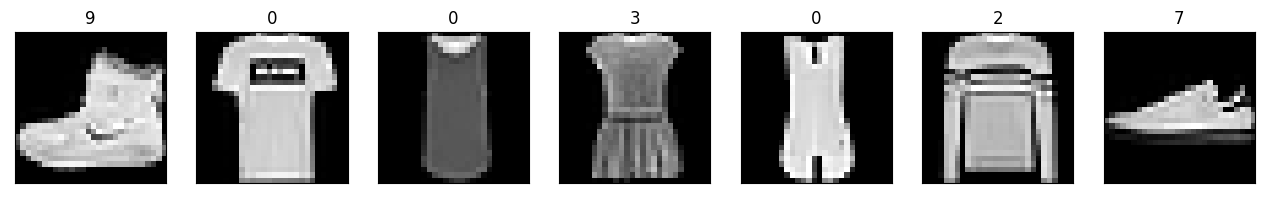

Original shape of X_train = (60000, 28, 28)
Original shape of X_test = (10000, 28, 28)
New X_train shape (60000, 784)
New X_test shape (10000, 784)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 3925      
                                                                 
 dense_7 (Dense)             (None, 4)                 24        
                                                                 
 dense_8 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,999
Trainable params: 3,999
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 1.9352 - acc: 0.3661 - val_loss: 1.5644 - val_acc: 0.4532
Epoch 2/3
1875/1875 [==============

In [14]:
# Sample code, 用来理解 Sequential / Funcational Model
# https://becominghuman.ai/sequential-vs-functional-model-in-keras-20684f766057

import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input

# Import fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Display the first 7 images
fig, axes = plt.subplots(ncols=7, sharex=False,
						 sharey=True, figsize=(16, 4))
for i in range(7):
	axes[i].set_title(y_train[i])
	axes[i].imshow(X_train[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

print("Original shape of X_train =", X_train.shape)
print("Original shape of X_test =", X_test.shape, end='\n')

# Reshape X_train to (60000, 784) and X_test to (10000, 784)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

print("New X_train shape", X_train.shape)
print("New X_test shape", X_test.shape, end='\n')

# Convert target (y_train and y_test) into one-hot
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
    
y_train = np.array(temp)

temp = []
for i in range(len(y_test)):
    temp.append(to_categorical(y_test[i], num_classes=10))

y_test = np.array(temp)

# Create and train sequential model
model_seq = Sequential()
model_seq.add(Dense(5, activation='sigmoid', input_shape=(X_train.shape[1],)))
model_seq.add(Dense(4, activation='sigmoid'))
model_seq.add(Dense(10, activation='softmax'))

model_seq.summary()

model_seq.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['acc'])

model_seq.fit(X_train, y_train, epochs=3, 
              validation_data=(X_test,y_test))

model_seq.save("a.h5")

# Create and train functional model
input1 = Input(shape=(X_train.shape[1],))
hidden1 = Dense(5, activation='sigmoid')(input1)
hidden2 = Dense(4, activation='sigmoid')(hidden1)
output = Dense(10, activation='softmax')(hidden2)
model_func = Model(inputs=input1, outputs=output)

model_func.summary()

model_func.compile(loss='categorical_crossentropy', 
                   optimizer='adam', 
                   metrics=['acc'])

model_func.fit(X_train, y_train, epochs=3, 
               validation_data=(X_test,y_test))
model_func.save("b.h5")